# 인공 신경망 기초

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
show_plt = False

In [15]:
def plot_decision_boundary(idx, weights, ax, cmap=None, label=None):
    x_values = np.array([0, 1])
    y_values = -(weights[0] / weights[2]) - (weights[1] / weights[2]) * x_values

    #
    c1 = 255 - idx * 3
    c2 = 255 - idx * 3
    c3 = 255 - idx * 3

    #
    if cmap is None:
        if idx % 8 == 0:
            c1s = '00'
            c2s = '00'
            c3s = '00'
        elif idx % 8 == 1:
            c1s = '%02x' %(c1)
            c2s = '00'
            c3s = '00'
        elif idx % 8 == 2:
            c1s = '00'
            c2s = '%02x' %(c2)
            c3s = '00'
        elif idx % 8 == 3:
            c1s = '00'
            c2s = '00'
            c3s = '%02x' %(c3)
        elif idx % 8 == 4:
            c1s = '%02x' %(c1)
            c2s = '%02x' %(c2)
            c3s = '00'
        elif idx % 8 == 5:
            c1s = '%02x' %(c1)
            c2s = '00'
            c3s = '%02x' %(c3)
        elif idx % 8 == 6:
            c1s = '00'
            c2s = '%02x' %(c2)
            c3s = '%02x' %(c3)
        elif idx % 8 == 7:
            c1s = '%02x' %(c1)
            c2s = '%02x' %(c2)
            c3s = '%02x' %(c3)
    else:
        c1s = '00'
        c2s = '%02x' %(c2)
        c3s = '00'
        
    
    color = f'#{c1s}{c2s}{c3s}'
    print(f'idx = {idx}, color = {color}')

    #
    ax.plot(x_values, y_values, label=label, c=color)

In [19]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = np.random.rand(3) * 2 - 1  # 두 입력 + 편향을 위한 가중치
        self.learning_rate = learning_rate
        self.weights_history = [self.weights.copy()]

    def predict(self, inputs):
        # y = w * x + b
        #   inputs      = x
        #   weights[1:] = w
        #   weights[0]  = b
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)                
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                self.weights_history.append(self.weights.copy())


[array([-0.8257414 , -0.95956321,  0.66523969]),
 array([-0.8257414 , -0.95956321,  0.66523969]),
 array([-0.8257414 , -0.95956321,  0.66523969]),
 array([-0.8257414 , -0.95956321,  0.66523969]),
 array([-0.7257414 , -0.85956321,  0.76523969]),
 array([-0.7257414 , -0.85956321,  0.76523969]),
 array([-0.8257414 , -0.85956321,  0.66523969]),
 array([-0.8257414 , -0.85956321,  0.66523969]),
 array([-0.7257414 , -0.75956321,  0.76523969]),
 array([-0.7257414 , -0.75956321,  0.76523969]),
 array([-0.8257414 , -0.75956321,  0.66523969]),
 array([-0.8257414 , -0.75956321,  0.66523969]),
 array([-0.7257414 , -0.65956321,  0.76523969]),
 array([-0.7257414 , -0.65956321,  0.76523969]),
 array([-0.8257414 , -0.65956321,  0.66523969]),
 array([-0.8257414 , -0.65956321,  0.66523969]),
 array([-0.7257414 , -0.55956321,  0.76523969]),
 array([-0.7257414 , -0.55956321,  0.76523969]),
 array([-0.8257414 , -0.55956321,  0.66523969]),
 array([-0.8257414 , -0.55956321,  0.66523969]),
 array([-0.7257414 ,

idx = 0, color = #000000
idx = 1, color = #fc0000
idx = 2, color = #00f900
idx = 3, color = #0000f6
idx = 4, color = #f3f300
idx = 5, color = #f000f0
idx = 6, color = #00eded
idx = 7, color = #eaeaea
idx = 8, color = #000000
idx = 9, color = #e40000
idx = 10, color = #00e100
idx = 11, color = #0000de
idx = 12, color = #dbdb00
idx = 13, color = #d800d8
idx = 14, color = #00d5d5
idx = 15, color = #d2d2d2
idx = 16, color = #000000


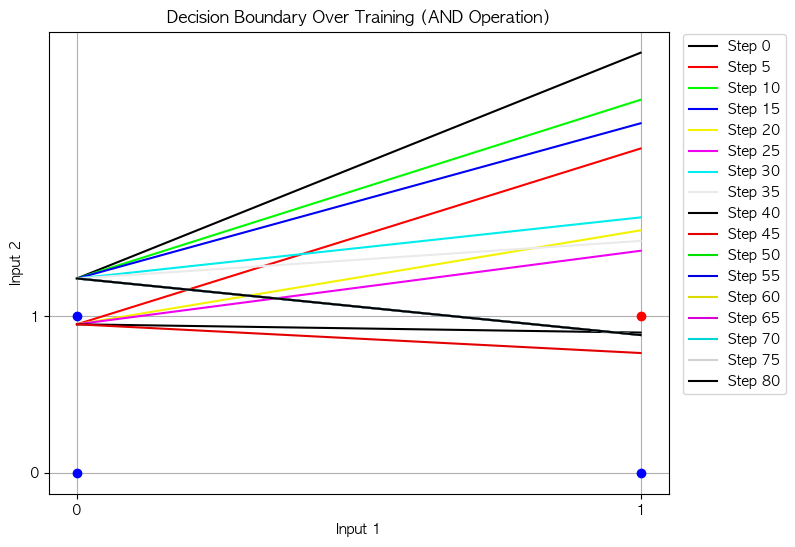

In [21]:
# AND 게이트 훈련 데이터 및 레이블
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# 퍼셉트론 생성 및 학습
perceptron = SimplePerceptron()
perceptron.train(training_inputs, labels, epochs=20)

#
display(perceptron.weights_history)

# 시각화
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 입력 데이터 플로팅
for i, input in enumerate(training_inputs):
    if labels[i] == 1:
        plt.plot(input[0], input[1], 'ro')
    else:
        plt.plot(input[0], input[1], 'bo')

# 학습 과정에서 결정 경계 플로팅
for i in range(0, len(perceptron.weights_history), 5):
    plot_decision_boundary(i // 5, perceptron.weights_history[i], ax, label=f"Step {i}")

plt.title("Decision Boundary Over Training (AND Operation)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
plt.grid(True)
plt.show()



In [5]:
# 시각화
if show_plt:
    
    # AND 게이트 훈련 데이터 및 레이블
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 0, 0, 1])
    
    # 퍼셉트론 생성 및 학습
    perceptron = SimplePerceptron()
    perceptron.train(training_inputs, labels, epochs=20)
    
    # 학습 과정에서 결정 경계 플로팅
    for i in range(0, len(perceptron.weights_history)):
    
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
    
        # 입력 데이터 플로팅
        for j, input in enumerate(training_inputs):
            if labels[j] == 1:
                plt.plot(input[0], input[1], 'ro')
            else:
                plt.plot(input[0], input[1], 'bo')
        
        #
        plot_decision_boundary(i, perceptron.weights_history[i], ax, cmap=True, label=f"Step {i}")
    
        #
        title0 = "Decision Boundary Over Training (AND Operation) - step %0d" %(i)
    
        #
        title1 = f'''{['%.12f' %(w) for w in perceptron.weights_history[i] ]}'''
    
        #
        title = '\n'.join([title0, title1])
    
        #
        plt.title(title)
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.xticks([0, 1])
        plt.yticks([0, 1])
        plt.xlim([-1, 2])
        plt.ylim([-1, 2])
        plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
        plt.grid(True)
        #plt.show()
    
        #
        plt.gcf();
        plt.savefig('figure_%02d.png' %(i))


<img src="1_0_AND/1_0_AND_0.1.gif">

idx = 0, color = #000000
idx = 1, color = #fc0000
idx = 2, color = #00f900
idx = 3, color = #0000f6
idx = 4, color = #f3f300
idx = 5, color = #f000f0
idx = 6, color = #00eded
idx = 7, color = #eaeaea
idx = 8, color = #000000
idx = 9, color = #e40000
idx = 10, color = #00e100
idx = 11, color = #0000de
idx = 12, color = #dbdb00
idx = 13, color = #d800d8
idx = 14, color = #00d5d5
idx = 15, color = #d2d2d2
idx = 16, color = #000000


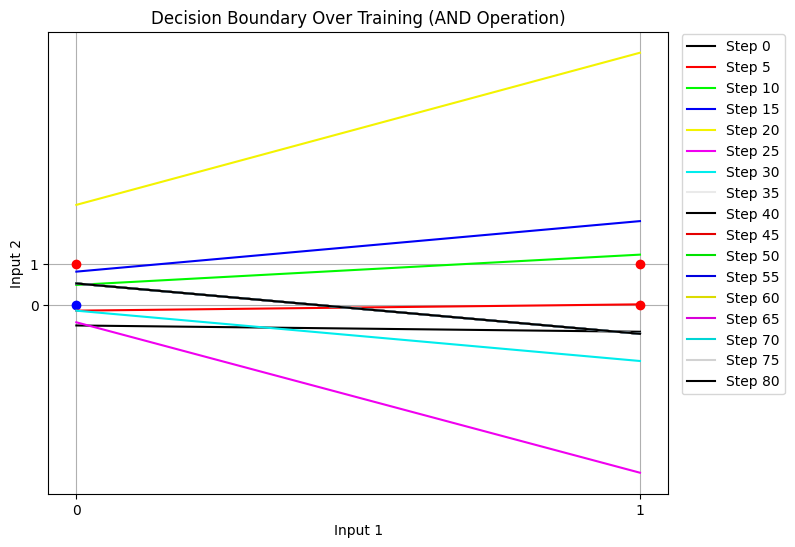

In [6]:
# AND 게이트 훈련 데이터 및 레이블
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

# 퍼셉트론 생성 및 학습
perceptron = SimplePerceptron()
perceptron.train(training_inputs, labels, epochs=20)

# 시각화
plt.figure(figsize=(8, 6))
ax = plt.gca()

# 입력 데이터 플로팅
for i, input in enumerate(training_inputs):
    if labels[i] == 1:
        plt.plot(input[0], input[1], 'ro')
    else:
        plt.plot(input[0], input[1], 'bo')

# 학습 과정에서 결정 경계 플로팅
for i in range(0, len(perceptron.weights_history), 5):
    plot_decision_boundary(i // 5, perceptron.weights_history[i], ax, label=f"Step {i}")

plt.title("Decision Boundary Over Training (AND Operation)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
plt.grid(True)
plt.show()



In [7]:
if show_plt:
    
    # AND 게이트 훈련 데이터 및 레이블
    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 1, 1, 1])
    
    # 퍼셉트론 생성 및 학습
    perceptron = SimplePerceptron()
    perceptron.train(training_inputs, labels, epochs=20)
    
    # 학습 과정에서 결정 경계 플로팅
    for i in range(0, len(perceptron.weights_history)):
        
        # 시각화
        plt.figure(figsize=(8, 6))
        ax = plt.gca()
    
        # 입력 데이터 플로팅
        for j, input in enumerate(training_inputs):
            if labels[j] == 1:
                plt.plot(input[0], input[1], 'ro')
            else:
                plt.plot(input[0], input[1], 'bo')
        
        #
        plot_decision_boundary(i, perceptron.weights_history[i], ax, cmap=True, label=f"Step {i}")
    
        #
        title0 = "Decision Boundary Over Training (OR Operation) - step %0d" %(i)
    
        #
        title1 = f'''{['%.12f' %(w) for w in perceptron.weights_history[i] ]}'''
    
        #
        title = '\n'.join([title0, title1])
    
        #
        plt.title(title)
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.xticks([0, 1])
        plt.yticks([0, 1])
        plt.xlim([-1, 2])
        plt.ylim([-1, 2])
        plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.2))
        plt.grid(True)
        #plt.show()
    
        #
        plt.gcf();
        plt.savefig('figure_%02d.png' %(i))

<img src="1_1_OR/1_1_OR_0.1.gif">

# XOR 문제 해결을 위한 다층 퍼셉트론 구현 - Sigmoid

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
# XOR 문제에 대한 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 가중치와 편향 초기화
np.random.seed(0)
weights0 = np.random.random((2, 2))  # 은닉층 가중치
weights1 = np.random.random((2, 1))  # 출력층 가중치
bias0 = np.random.random((1, 2))     # 은닉층 편향
bias1 = np.random.random((1, 1))     # 출력층 편향

# 학습 과정
for i in range(10000):
    # 순전파
    hidden_layer_input = np.dot(X, weights0) + bias0
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)

    # 역전파
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = output_delta.dot(weights1.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # 가중치와 편향 업데이트
    weights1 += hidden_layer_output.T.dot(output_delta)
    weights0 += X.T.dot(hidden_delta)
    bias1 += np.sum(output_delta, axis=0)
    bias0 += np.sum(hidden_delta, axis=0)

# 예측
print("Output after training:")
print(output)


Output after training:
[[0.01305838]
 [0.98884064]
 [0.98883857]
 [0.01148127]]


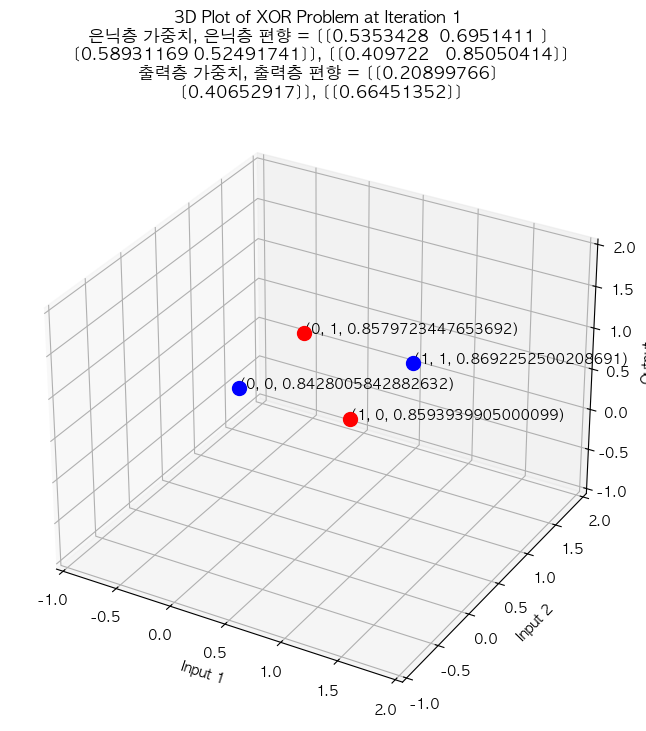

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm 
    #fm._rebuild() 
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝


# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# XOR 문제에 대한 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 가중치와 편향 초기화
np.random.seed(0)
weights0 = np.random.random((2, 2))  # 은닉층 가중치
weights1 = np.random.random((2, 1))  # 출력층 가중치
bias0 = np.random.random((1, 2))     # 은닉층 편향
bias1 = np.random.random((1, 1))     # 출력층 편향

# 학습 과정과 시각화를 위한 준비
n_iterations = 10000
frames = 2000
iter_per_frame = n_iterations // frames
plotting_indices = np.linspace(0, n_iterations, frames, endpoint=False, dtype=int)

# 3D 그래프 준비
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 학습 과정
for i in range(n_iterations):
    # 순전파
    hidden_layer_input = np.dot(X, weights0) + bias0
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)

    # 역전파
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = output_delta.dot(weights1.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # 가중치와 편향 업데이트
    weights1 += hidden_layer_output.T.dot(output_delta)
    weights0 += X.T.dot(hidden_delta)
    bias1 += np.sum(output_delta, axis=0)
    bias0 += np.sum(hidden_delta, axis=0)

    # 시각화 프레임
    if i in plotting_indices:
        ax.clear()
        for j in range(4):
            #ax.scatter(X[j, 0], X[j, 1], y[j][0], color='b' if y[j] == 0 else 'r', s=100)
            #ax.text(X[j, 0], X[j, 1], y[j][0], f"({X[j, 0]}, {X[j, 1]}, {y[j][0]})", size=10, zorder=1)
            ax.scatter(X[j, 0], X[j, 1], output[j][0], color='b' if y[j] == 0 else 'r', s=100)
            ax.text(X[j, 0], X[j, 1], output[j][0], f"({X[j, 0]}, {X[j, 1]}, {output[j][0]})", size=10, zorder=1)

        ax.set_xlabel('Input 1')
        ax.set_ylabel('Input 2')
        ax.set_zlabel('Output')

        ax.set_xlim((-1, 2))
        ax.set_ylim((-1, 2))
        ax.set_zlim((-1, 2))

        #
        title0 = f'3D Plot of XOR Problem at Iteration {i+1}'
        title1 = f'은닉층 가중치, 은닉층 편향 = {weights0}, {bias0}'
        title2 = f'출력층 가중치, 출력층 편향 = {weights1}, {bias1}'
        title = '\n'.join([title0, title1, title2])

        #
        ax.set_title(title)

        #
        plt.pause(0.025)

plt.show()


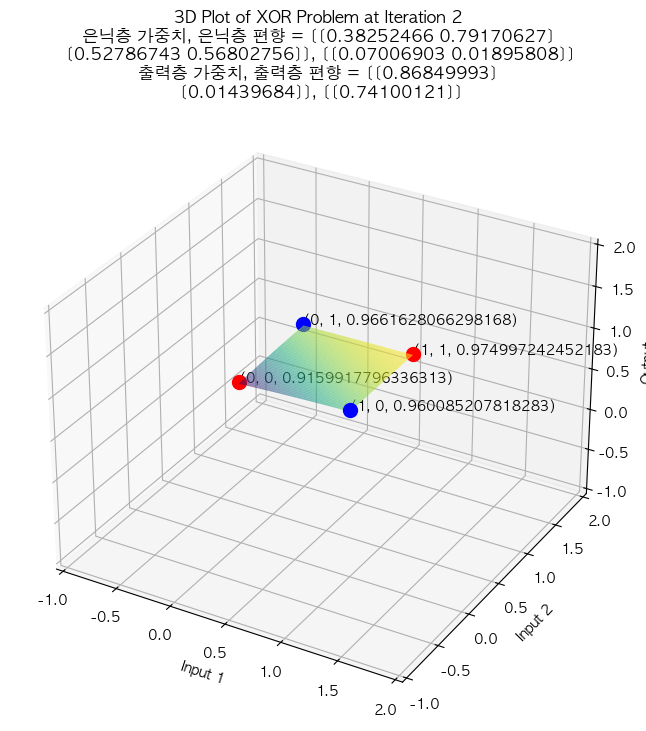

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm 
    #fm._rebuild() 
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

# XOR 문제 해결을 위한 다층 퍼셉트론의 학습 과정을 3D 그래프로 시각화 (meshgrid 포함)

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR 문제에 대한 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 가중치와 편향 초기화
#np.random.seed(0)
weights0 = np.random.random((2, 2))  # 은닉층 가중치
weights1 = np.random.random((2, 1))  # 출력층 가중치
bias0 = np.random.random((1, 2))     # 은닉층 편향
bias1 = np.random.random((1, 1))     # 출력층 편향

# 3D 그래프 준비
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# meshgrid 생성
x_range = np.linspace(0, 1, 50)
y_range = np.linspace(0, 1, 50)
xx, yy = np.meshgrid(x_range, y_range)
grid = np.c_[xx.ravel(), yy.ravel()]



learning_rate = 3


# 순전파 함수 정의
def forward(x, weights0, weights1, bias0, bias1):
    hidden_layer_input = learning_rate * np.dot(x, weights0) + bias0
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = learning_rate * np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)
    return output

# 학습 과정
for i in range(1, 100000, 1000):
    # 순전파
    hidden_layer_input = learning_rate * np.dot(X, weights0) + bias0
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = learning_rate * np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)

    # 역전파
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = output_delta.dot(weights1.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

    # 가중치와 편향 업데이트
    weights1 += hidden_layer_output.T.dot(output_delta)
    weights0 += X.T.dot(hidden_delta)
    bias1 += np.sum(output_delta, axis=0)
    bias0 += np.sum(hidden_delta, axis=0)

    # meshgrid에서의 예측값 계산
    zz = forward(grid, weights0, weights1, bias0, bias1)
    zz = zz.reshape(xx.shape)

    # 3D 그래프 플로팅
    ax.clear()
    ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.6)

    #ax.scatter(X[:, 0], X[:, 1], y[:, 0], color='r', s=50)
    for j in range(4):
        ax.scatter(X[j, 0], X[j, 1], output[j][0], color='b' if y[j] > 0.5 else 'r', s=100)
        ax.text(X[j, 0], X[j, 1], output[j][0], f"({X[j, 0]}, {X[j, 1]}, {output[j][0]})", size=10, zorder=1)

    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_zlabel('Output')
    
    ax.set_xlim((-1, 2))
    ax.set_ylim((-1, 2))
    ax.set_zlim((-1, 2))

    #
    title0 = f'3D Plot of XOR Problem at Iteration {i+1}'
    title1 = f'은닉층 가중치, 은닉층 편향 = {weights0}, {bias0}'
    title2 = f'출력층 가중치, 출력층 편향 = {weights1}, {bias1}'
    title = '\n'.join([title0, title1, title2])

    #
    ax.set_title(title)

    plt.pause(0.1)

plt.show()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm 
    #fm._rebuild() 
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝


# XOR 문제를 해결하기 위한 다층 퍼셉트론의 구현 코드를 수정합니다.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 평면 시각화를 위한 순전파 함수
def forward_for_plotting(x):
    hidden_layer_input = np.dot(x, weights0) + bias0
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)
    return output
    
if show_plt:

    # XOR 문제에 대한 입력과 출력
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    
    # 가중치와 편향 초기화 (작은 무작위 값)
    np.random.seed(0)
    weights0 = np.random.uniform(-1, 1, (2, 2))  # 은닉층 가중치
    weights1 = np.random.uniform(-1, 1, (2, 1))  # 출력층 가중치
    bias0 = np.random.uniform(-1, 1, (1, 2))     # 은닉층 편향
    bias1 = np.random.uniform(-1, 1, (1, 1))     # 출력층 편향

    #
    fig = plt.figure(figsize=(12, 8))
    
    # 학습률 설정
    learning_rate = 0.1
    
    # 학습 과정
    n_iterations = 50000
    for i in range(n_iterations):
        # 순전파
        hidden_layer_input = np.dot(X, weights0) + bias0
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
        output = sigmoid(output_layer_input)
    
        # 역전파
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
    
        hidden_error = output_delta.dot(weights1.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
    
        # 가중치와 편향 업데이트
        weights1 += learning_rate * hidden_layer_output.T.dot(output_delta)
        weights0 += learning_rate * X.T.dot(hidden_delta)
        bias1 += learning_rate * np.sum(output_delta, axis=0)
        bias0 += learning_rate * np.sum(hidden_delta, axis=0)
    
    
        if i % 100 == 0:
            # 3D 그래프 준비
            plt.clf()
            ax = fig.add_subplot(111, projection='3d')
    
            # meshgrid 생성
            x_range = np.linspace(0, 1, 50)
            y_range = np.linspace(0, 1, 50)
            xx, yy = np.meshgrid(x_range, y_range)
            grid = np.c_[xx.ravel(), yy.ravel()]
    
            # meshgrid에서의 예측값 계산 및 평면 시각화
            zz = forward_for_plotting(grid).reshape(xx.shape)
            ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.6)
    
            # XOR 연산의 결과를 3D 공간에 표시
            for j in range(4):
                ax.scatter(X[j, 0], X[j, 1], y[j], color='b' if y[j] == 0 else 'r', s=100)
                ax.scatter(X[j, 0], X[j, 1], output[j], color='g' if output[j] > 0.5 else 'purple', s=50)
    
            ax.set_xlabel('Input 1')
            ax.set_ylabel('Input 2')
            ax.set_zlabel('Output')
    
            #
            ax.set_xlim((-0.5, 1.5))
            ax.set_ylim((-0.5, 1.5))
            ax.set_zlim((-0.5, 1.5))
    
            #
            title0 = f'3D Plot of XOR Problem at Iteration {i+1}'
            title1 = f'은닉층 가중치, 은닉층 편향 = {weights0}, {bias0}'
            title2 = f'출력층 가중치, 출력층 편향 = {weights1}, {bias1}'
            title = '\n'.join([title0, title1, title2])
    
            #
            ax.set_title(title, wrap=False)
    
            #
            plt.tight_layout()
            plt.pause(0.025)
            plt.savefig('figure_%04d.png' %(i // 100))

XOR 문제를 Sigmoid 활성화 함수를 사용하여 해결한 결과입니다.

<img src="1_2_XOR/1_2_XOR_1_Sigmoid_0.05.gif">

----
ReLU 와 Sigmoid 활성화 함수를 사용하여 XOR 문제를 해결할 수도 있습니다.

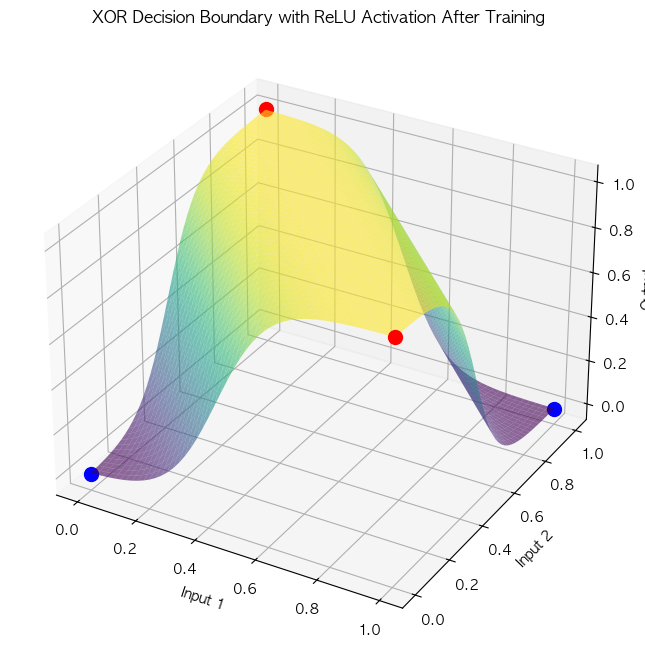

In [26]:
# XOR 문제를 해결하기 위한 다층 퍼셉트론을 ReLU와 시그모이드 활성화 함수를 사용하여 구현합니다.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ReLU 함수와 그 미분
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
    #return x * (1 - x)

# XOR 문제에 대한 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 가중치와 편향 초기화
np.random.seed(0)
weights0 = np.random.uniform(-1, 1, (2, 2))  # 은닉층 가중치
weights1 = np.random.uniform(-1, 1, (2, 1))  # 출력층 가중치
bias0 = np.random.uniform(-1, 1, (1, 2))     # 은닉층 편향
bias1 = np.random.uniform(-1, 1, (1, 1))     # 출력층 편향

# 학습률 설정
learning_rate = 0.1

# 학습 과정
n_iterations = 10000
for i in range(n_iterations):
    # 순전파
    hidden_layer_input = np.dot(X, weights0) + bias0
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)

    # 역전파
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = output_delta.dot(weights1.T)
    hidden_delta = hidden_error * relu_derivative(hidden_layer_output)

    # 가중치와 편향 업데이트
    weights1 += learning_rate * hidden_layer_output.T.dot(output_delta)
    weights0 += learning_rate * X.T.dot(hidden_delta)
    bias1 += learning_rate * np.sum(output_delta, axis=0)
    bias0 += learning_rate * np.sum(hidden_delta, axis=0)

# 3D 그래프 준비
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# meshgrid 생성
x_range = np.linspace(0, 1, 50)
y_range = np.linspace(0, 1, 50)
xx, yy = np.meshgrid(x_range, y_range)
grid = np.c_[xx.ravel(), yy.ravel()]

# 순전파 함수 정의
def forward(x):
    hidden_layer_input = np.dot(x, weights0) + bias0
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)
    return output

# meshgrid에서의 예측값 계산 및 평면 시각화
zz = forward(grid).reshape(xx.shape)
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.6)

# XOR 연산의 결과를 3D 공간에 표시
for i in range(4):
    ax.scatter(X[i, 0], X[i, 1], y[i], color='b' if y[i] == 0 else 'r', s=100)

ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Output')
ax.set_title('XOR Decision Boundary with ReLU Activation After Training')

plt.show()


In [14]:
# XOR 문제를 해결하기 위한 다층 퍼셉트론을 ReLU와 시그모이드 활성화 함수를 사용하여 구현합니다.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm 
    #fm._rebuild() 
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝


# ReLU 함수와 그 미분
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 순전파 함수 정의
def forward(x):
    hidden_layer_input = np.dot(x, weights0) + bias0
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
    output = sigmoid(output_layer_input)
    return output

if show_plt:
    # XOR 문제에 대한 입력과 출력
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    
    # 가중치와 편향 초기화
    np.random.seed(0)
    weights0 = np.random.uniform(-1, 1, (2, 2))  # 은닉층 가중치
    weights1 = np.random.uniform(-1, 1, (2, 1))  # 출력층 가중치
    bias0 = np.random.uniform(-1, 1, (1, 2))     # 은닉층 편향
    bias1 = np.random.uniform(-1, 1, (1, 1))     # 출력층 편향
    
    # 3D 그래프 준비    
    fig = plt.figure(figsize=(12, 8))
    
    # 학습률 설정
    learning_rate = 0.1
    
    # 학습 과정
    n_iterations = 10000
    for i in range(n_iterations):
        # 순전파
        hidden_layer_input = np.dot(X, weights0) + bias0
        hidden_layer_output = relu(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights1) + bias1
        output = sigmoid(output_layer_input)
    
        # 역전파
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)
    
        hidden_error = output_delta.dot(weights1.T)
        hidden_delta = hidden_error * relu_derivative(hidden_layer_output)
    
        # 가중치와 편향 업데이트
        weights1 += learning_rate * hidden_layer_output.T.dot(output_delta)
        weights0 += learning_rate * X.T.dot(hidden_delta)
        bias1 += learning_rate * np.sum(output_delta, axis=0)
        bias0 += learning_rate * np.sum(hidden_delta, axis=0)
    
        if i % 100 == 0:
            plt.clf()
            ax = fig.add_subplot(111, projection='3d')
            
            # meshgrid 생성
            x_range = np.linspace(0, 1, 50)
            y_range = np.linspace(0, 1, 50)
            xx, yy = np.meshgrid(x_range, y_range)
            grid = np.c_[xx.ravel(), yy.ravel()]
            
            # meshgrid에서의 예측값 계산 및 평면 시각화
            zz = forward(grid).reshape(xx.shape)
            ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.6)
            
            # XOR 연산의 결과를 3D 공간에 표시
            for j in range(4):
                ax.scatter(X[j, 0], X[j, 1], y[j], color='b' if y[j] == 0 else 'r', s=100)
            
            ax.set_xlabel('Input 1')
            ax.set_ylabel('Input 2')
            ax.set_zlabel('Output')
            
            #
            ax.set_xlim((-0.5, 1.5))
            ax.set_ylim((-0.5, 1.5))
            ax.set_zlim((-0.5, 1.5))
            
            #
            title0 = f'3D Plot of XOR Problem at Iteration {i+1}'
            title1 = f'은닉층 가중치, 은닉층 편향 = {weights0}, {bias0}'
            title2 = f'출력층 가중치, 출력층 편향 = {weights1}, {bias1}'
            title = '\n'.join([title0, title1, title2])
            
            #
            ax.set_title(title, wrap=False)
            
            #
            plt.tight_layout()
            plt.pause(0.025)
            plt.savefig('figure_%04d.png' %(i // 100))


XOR 문제를 ReLU 와 Sigmoid 활성화 함수를 사용하여 해결한 결과입니다.

<img src="1_2_XOR/1_2_XOR_2_ReLU_0.05.gif">